In [1]:
import datetime
today = datetime.date.today()
date = str(today)
#date = "2020-03-26"

#url = "https://www.ecdc.europa.eu/sites/default/files/documents/COVID-19-geographic-disbtribution-worldwide-%s.xlsx" % date
url = "https://www.ecdc.europa.eu/sites/default/files/documents/COVID-19-geographic-disbtribution-worldwide.xlsx"

import pandas as pd
data = pd.read_excel(url)

In [2]:
countries = ['DE', 'ES', 'FR', 'IT', 'SE', 'UK', 'US', 'KR', 'JP', 'CN', 'IN']

import math
def rawData(df, title):
    cases = pd.DataFrame(columns = ['Date'])

    for country in countries:
        countryData = df[df['geoId'] == country][['dateRep', title]]
        countryData.columns = ['Date', country]
        cases = pd.merge(cases, countryData, on='Date', how='right')
        cases = cases.fillna(0)

    return cases.sort_values(by=['Date'])

def sumData(df):
    a = df[countries].to_numpy()

    for i in range(1, df.shape[0]):
        a[i] = a[i] + a[i - 1]

    return pd.DataFrame(data=a, index=cases['Date'], columns=countries)

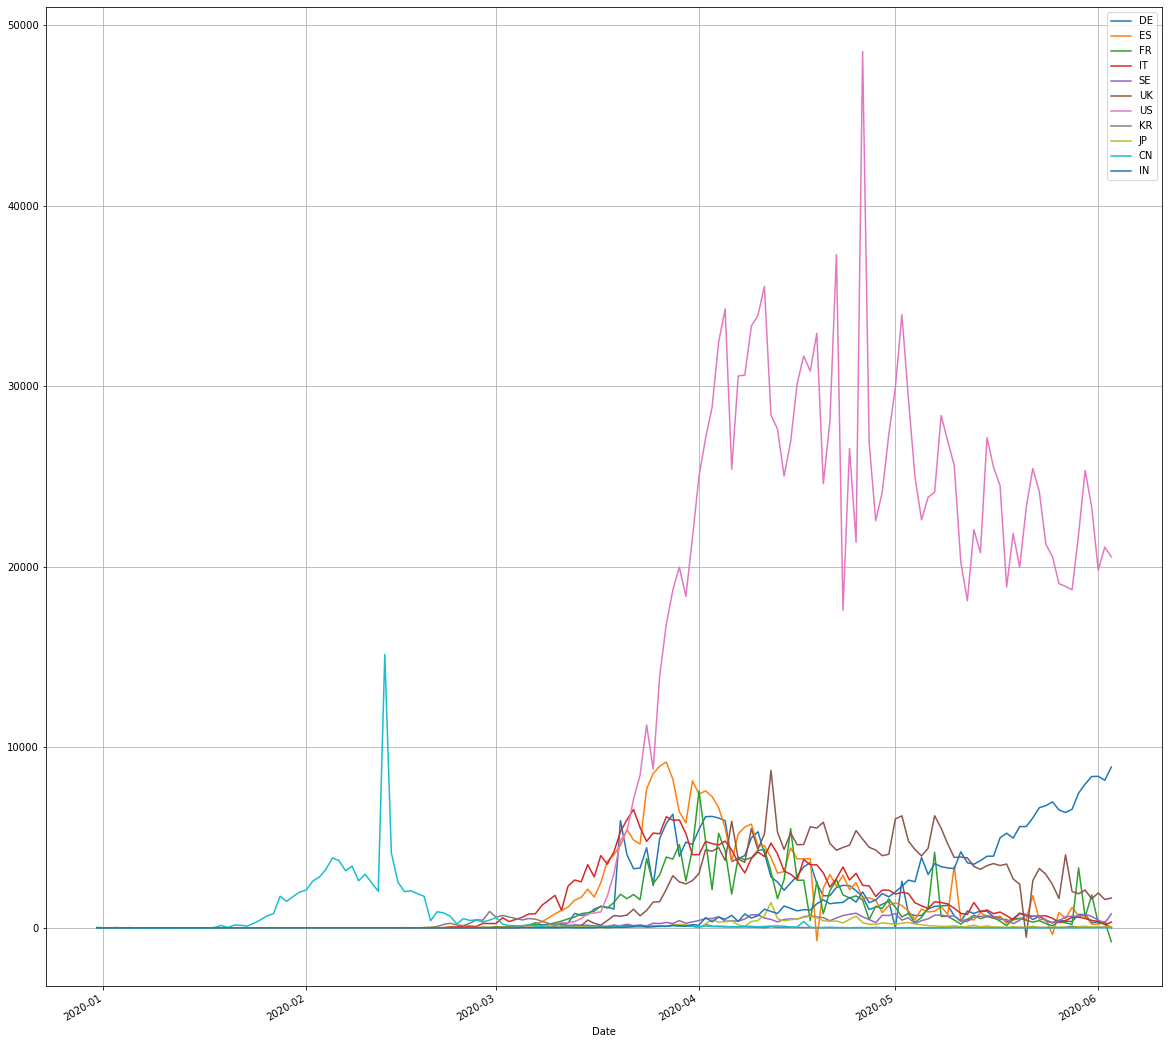

In [3]:
cases = rawData(data, 'cases')
cases.plot.line(x='Date', y=countries, figsize=(20, 20), grid=True)

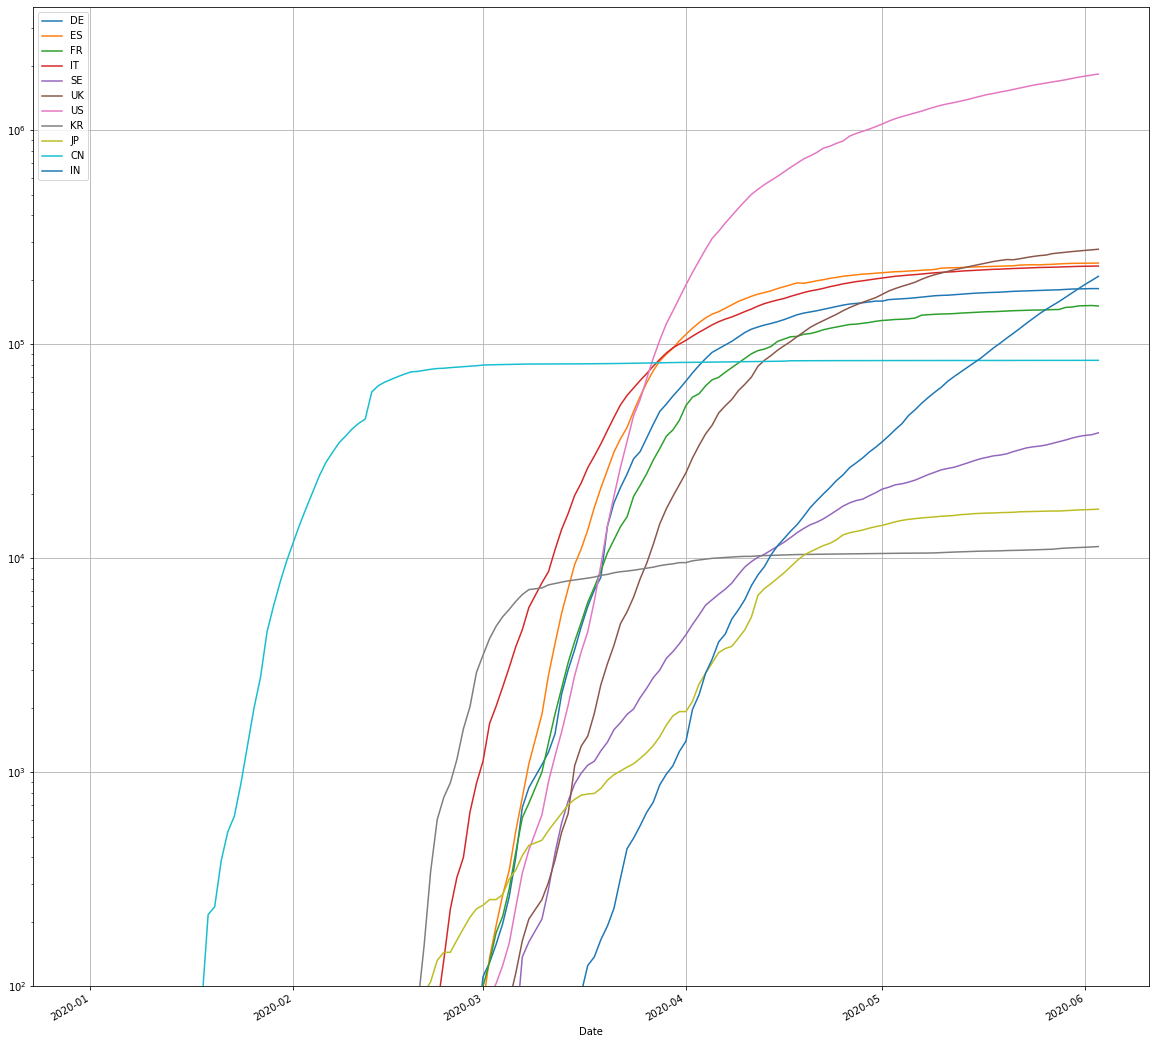

In [4]:
sumCases = sumData(cases)
sumCases.plot.line(logy=True, figsize=(20, 20), ylim=(100, None), grid=True)

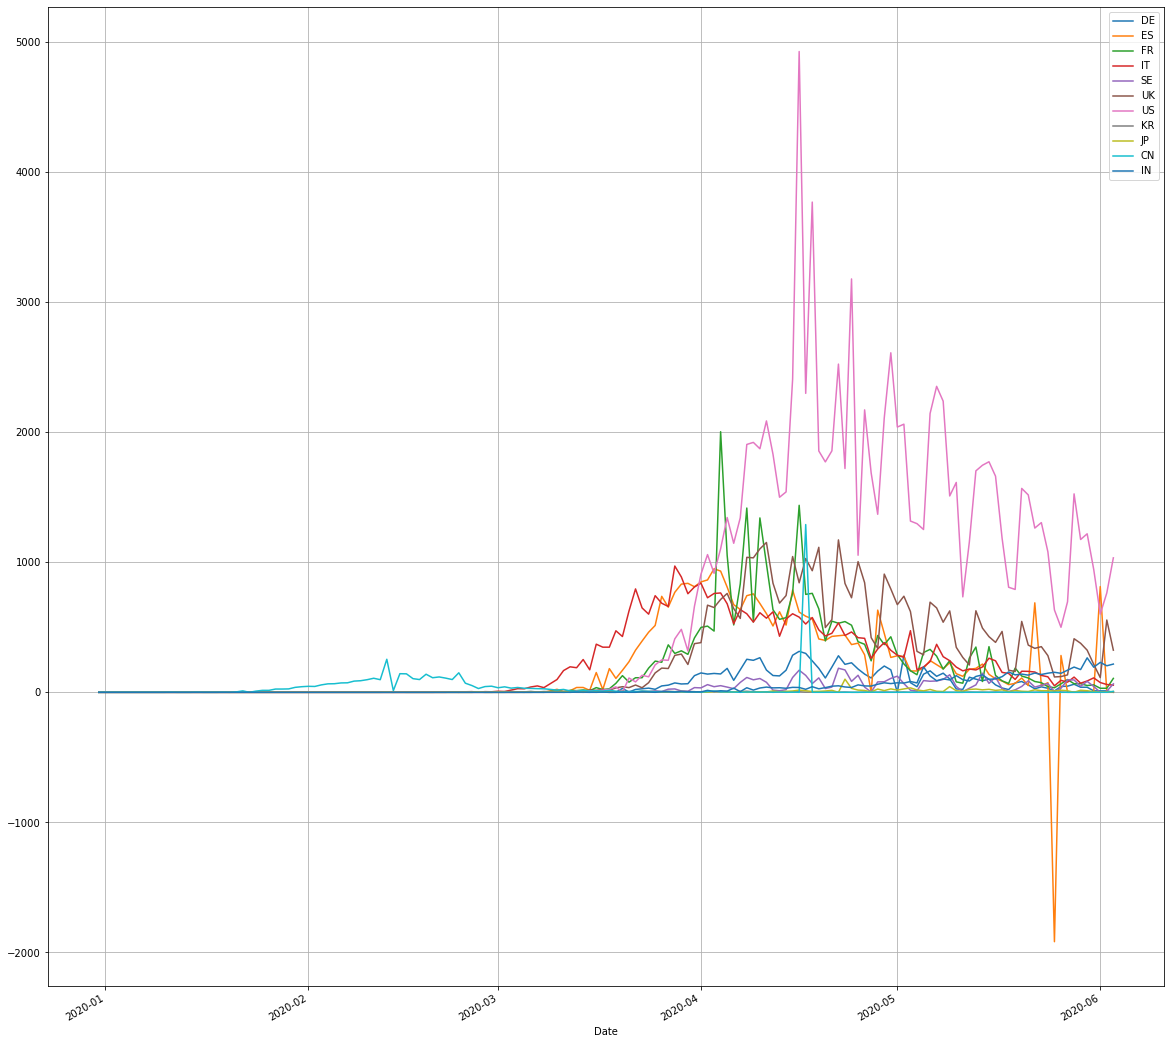

In [5]:
deaths = rawData(data, 'deaths')
deaths.plot.line(x='Date', y=countries, figsize=(20, 20), grid=True)

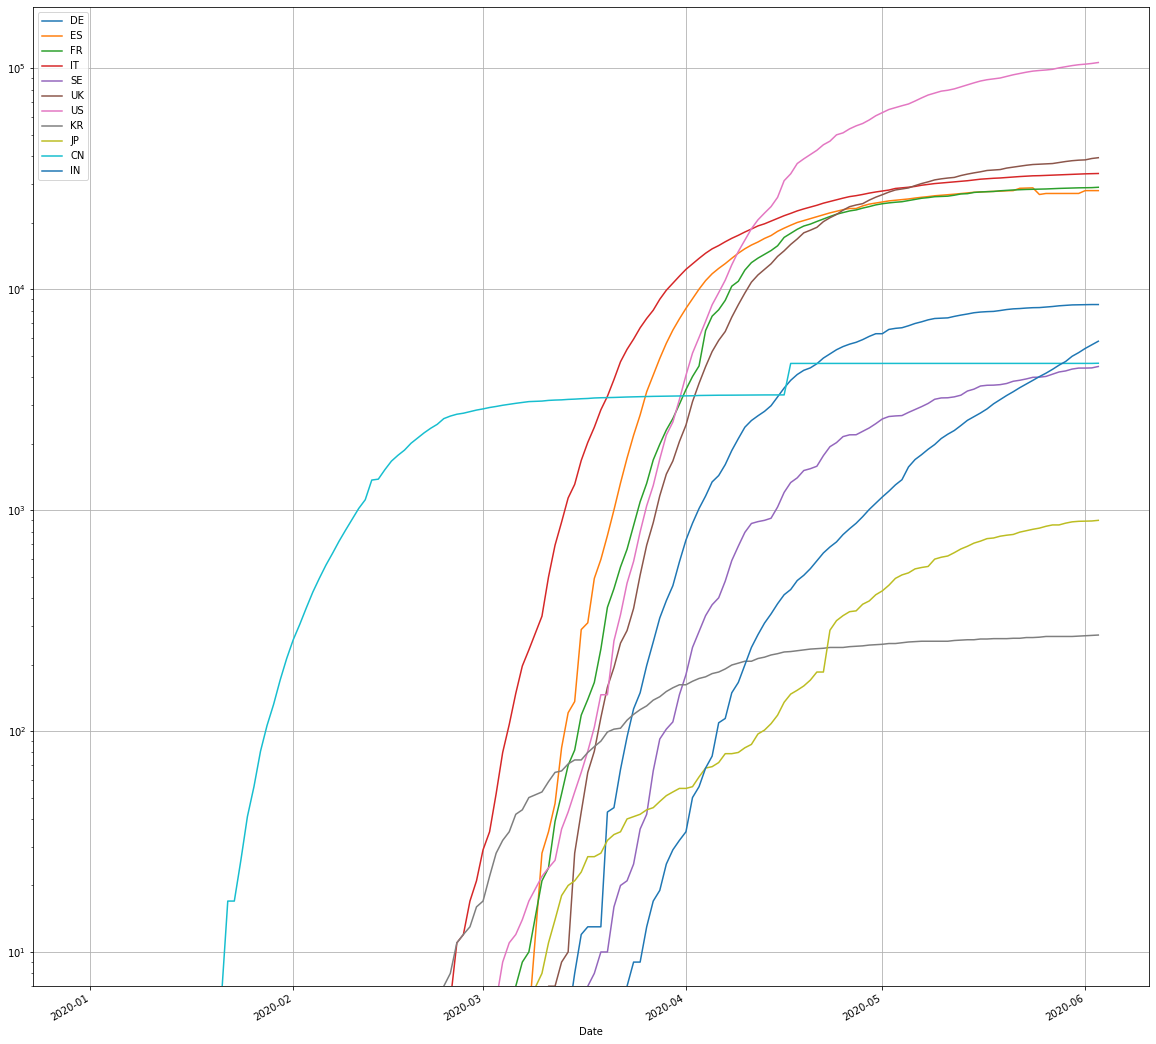

In [6]:
sumDeaths = sumData(deaths)
sumDeaths.plot.line(logy=True, figsize=(20, 20), ylim=(7, None), grid=True)

In [7]:
cases.tail(15)

,Date,DE,ES,FR,IT,SE,UK,US,KR,JP,CN,IN
13,2020-05-20,797.0,518.0,524,813,422,2412,19970,32,20,2,5611
12,2020-05-21,745.0,482.0,418,665,724,-525,23285,12,39,2,5609
11,2020-05-22,460.0,1787.0,318,642,649,2615,25434,20,89,12,6088
10,2020-05-23,638.0,466.0,403,652,637,3287,24147,23,23,2,6654
9,2020-05-24,431.0,482.0,240,669,379,2959,21236,25,14,3,6767
8,2020-05-25,289.0,-372.0,115,531,271,2405,20568,16,31,11,6977
7,2020-05-26,432.0,859.0,358,300,384,1625,19064,19,42,7,6535
6,2020-05-27,362.0,510.0,276,397,597,4043,18910,40,28,1,6387
5,2020-05-28,353.0,1137.0,191,584,648,2013,18721,79,0,3,6566
4,2020-05-29,741.0,658.0,3325,593,639,1887,21817,58,68,0,7466


In [8]:
sumCases.tail(15)

,DE,ES,FR,IT,SE,UK,US,KR,JP,CN,IN
Date,,,,,,,,,,,
2020-05-20,175952.0,232122.0,143017.0,225207.0,30757.0,248751.0,1528447.0,10862.0,16352.0,84020.0,106750.0
2020-05-21,176697.0,232604.0,143435.0,225872.0,31481.0,248226.0,1551732.0,10874.0,16391.0,84022.0,112359.0
2020-05-22,177157.0,234391.0,143753.0,226514.0,32130.0,250841.0,1577166.0,10894.0,16480.0,84034.0,118447.0
2020-05-23,177795.0,234857.0,144156.0,227166.0,32767.0,254128.0,1601313.0,10917.0,16503.0,84036.0,125101.0
2020-05-24,178226.0,235339.0,144396.0,227835.0,33146.0,257087.0,1622549.0,10942.0,16517.0,84039.0,131868.0
2020-05-25,178515.0,234967.0,144511.0,228366.0,33417.0,259492.0,1643117.0,10958.0,16548.0,84050.0,138845.0
2020-05-26,178947.0,235826.0,144869.0,228666.0,33801.0,261117.0,1662181.0,10977.0,16590.0,84057.0,145380.0
2020-05-27,179309.0,236336.0,145145.0,229063.0,34398.0,265160.0,1681091.0,11017.0,16618.0,84058.0,151767.0
2020-05-28,179662.0,237473.0,145336.0,229647.0,35046.0,267173.0,1699812.0,11096.0,16618.0,84061.0,158333.0


In [9]:
deaths.tail(15)

,Date,DE,ES,FR,IT,SE,UK,US,KR,JP,CN,IN
13,2020-05-20,83.0,110.0,125,162,45,545,1568,0,8,0,140
12,2020-05-21,57.0,52.0,110,161,88,363,1518,1,6,0,132
11,2020-05-22,27.0,688.0,83,156,40,338,1263,0,19,0,148
10,2020-05-23,42.0,50.0,74,130,54,351,1305,2,12,0,137
9,2020-05-24,31.0,74.0,43,119,67,282,1080,0,12,0,147
8,2020-05-25,10.0,-1918.0,35,50,6,118,633,1,10,0,154
7,2020-05-26,45.0,283.0,65,92,31,121,500,2,16,0,146
6,2020-05-27,47.0,1.0,98,78,96,134,696,0,12,0,170
5,2020-05-28,62.0,1.0,66,117,95,412,1526,0,0,0,194
4,2020-05-29,39.0,2.0,66,70,46,377,1175,0,16,0,175


In [10]:
sumDeaths.tail(15)

,DE,ES,FR,IT,SE,UK,US,KR,JP,CN,IN
Date,,,,,,,,,,,
2020-05-20,8090.0,27888.0,28013.0,32036.0,3743.0,35341.0,91917.0,262.0,770.0,4615.0,3303.0
2020-05-21,8147.0,27940.0,28123.0,32197.0,3831.0,35704.0,93435.0,263.0,776.0,4615.0,3435.0
2020-05-22,8174.0,28628.0,28206.0,32353.0,3871.0,36042.0,94698.0,263.0,795.0,4615.0,3583.0
2020-05-23,8216.0,28678.0,28280.0,32483.0,3925.0,36393.0,96003.0,265.0,807.0,4615.0,3720.0
2020-05-24,8247.0,28752.0,28323.0,32602.0,3992.0,36675.0,97083.0,265.0,819.0,4615.0,3867.0
2020-05-25,8257.0,26834.0,28358.0,32652.0,3998.0,36793.0,97716.0,266.0,829.0,4615.0,4021.0
2020-05-26,8302.0,27117.0,28423.0,32744.0,4029.0,36914.0,98216.0,268.0,845.0,4615.0,4167.0
2020-05-27,8349.0,27118.0,28521.0,32822.0,4125.0,37048.0,98912.0,268.0,857.0,4615.0,4337.0
2020-05-28,8411.0,27119.0,28587.0,32939.0,4220.0,37460.0,100438.0,268.0,857.0,4615.0,4531.0
